DASC522 Case Study by a prior student


**Preamble**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# **Data Understanding**

Read the Data

In [ ]:
# Read the data
sat_data = pd.read_csv('satdb.csv')

In [ ]:
# Data Understanding Table
sat_data.describe()

,life,geo_longitude,perigee,apogee,eccentricity,inclination,period,launch_mass
count,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3091.000000,3070.000000
mean,6.262763,2.527157,6987.553796,7831.973183,0.008591,59.298672,351.153931,1012.319772
std,4.259524,36.527876,13012.944799,16596.678083,0.073299,31.199721,576.734388,1805.609058
min,0.250000,-179.800000,170.000000,280.000000,0.000000,0.000000,91.340000,1.000000
25%,4.000000,0.000000,538.000000,551.000000,0.000225,53.000000,95.600000,148.000000
50%,4.000000,0.000000,548.000000,561.000000,0.000939,53.000000,95.600000,260.000000
75%,7.000000,0.000000,1215.000000,1220.000000,0.001087,87.400000,100.700000,843.500000
max,30.000000,180.000000,37782.000000,330000.000000,0.957119,143.400000,11520.000000,22500.000000


In [ ]:
# Data Columns
sat_data.columns


Index(['life', 'orbit_class', 'geo_longitude', 'perigee', 'apogee',
       'eccentricity', 'inclination', 'period', 'launch_mass', 'gov', 'com',
       'mil'],
      dtype='object')

Visualizations

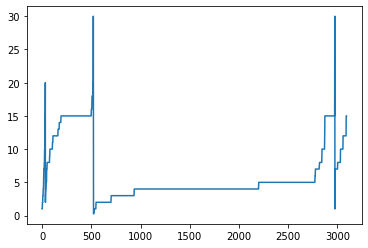

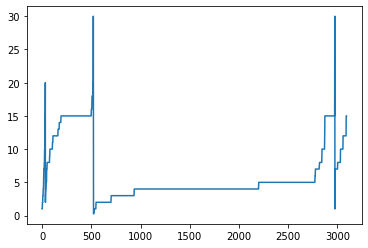

In [ ]:
# Visualization 0 - Build histograms of one input variable

column_to_plot = sat_data['life']

# method 1: using facade interface
plt.plot(column_to_plot)
plt.show()

# method 2: using object-oriented interface
fig, ax = plt.subplots(1)
ax.plot(column_to_plot)



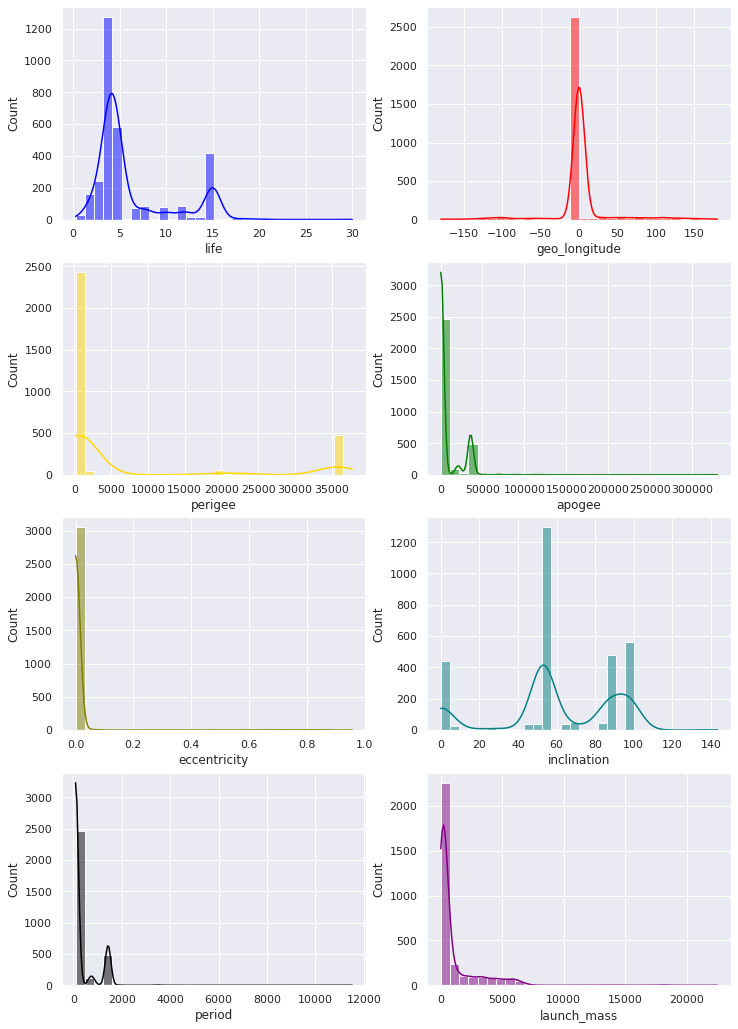

In [ ]:
# Visualization 1 - Build histograms of input variables

# just for reference: sat_columns = ['life', 'geo_longitude', 'perigee', 'apogee', 'eccentricity',
      #  'inclination', 'period', 'launch_mass']

sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 2, figsize=(12, 18))

sns.histplot(data=sat_data, x='life', bins=30, kde=True, color="blue",
             ax=axs[0,0])
sns.histplot(data=sat_data, x="geo_longitude", bins=30, kde=True, color="red",
             ax=axs[0, 1])
sns.histplot(data=sat_data, x="perigee", bins=30, kde=True, color="gold",
             ax=axs[1, 0])
sns.histplot(data=sat_data, x="apogee", bins=30, kde=True, color="green",
             ax=axs[1, 1])
sns.histplot(data=sat_data, x="eccentricity", bins=30, kde=True, color="olive",
             ax=axs[2, 0])
sns.histplot(data=sat_data, x="inclination", bins=30, kde=True, color="teal",
             ax=axs[2, 1])
sns.histplot(data=sat_data, x="period", bins=30, kde=True, color="black",
             ax=axs[3, 0])
sns.histplot(data=sat_data, x="launch_mass", bins=30, kde=True, color="purple",
             ax=axs[3, 1])

#fig.suptitle("Variables Histograms", fontsize=15)
plt.show()



###Just for fun - parent/child object hierarchy in matplotlib Figure objects

In [ ]:
print("List of the children of this figure object \n",
      *list(fig.get_children()), sep ="\n")

List of the children of this figure object 

Rectangle(xy=(0, 0), width=1, height=1, angle=0)
AxesSubplot(0.125,0.71587;0.352273x0.16413)
AxesSubplot(0.547727,0.71587;0.352273x0.16413)
AxesSubplot(0.125,0.518913;0.352273x0.16413)
AxesSubplot(0.547727,0.518913;0.352273x0.16413)
AxesSubplot(0.125,0.321957;0.352273x0.16413)
AxesSubplot(0.547727,0.321957;0.352273x0.16413)
AxesSubplot(0.125,0.125;0.352273x0.16413)
AxesSubplot(0.547727,0.125;0.352273x0.16413)


In [ ]:
print("List of the children of the Life histogram axis object \n",
      *list(axs[0,0].get_children()), sep ="\n")

List of the children of the Life histogram axis object 

Rectangle(xy=(0.25, 0), width=0.991667, height=28, angle=0)
Rectangle(xy=(1.24167, 0), width=0.991667, height=159, angle=0)
Rectangle(xy=(2.23333, 0), width=0.991667, height=240, angle=0)
Rectangle(xy=(3.225, 0), width=0.991667, height=1273, angle=0)
Rectangle(xy=(4.21667, 0), width=0.991667, height=581, angle=0)
Rectangle(xy=(5.20833, 0), width=0.991667, height=4, angle=0)
Rectangle(xy=(6.2, 0), width=0.991667, height=75, angle=0)
Rectangle(xy=(7.19167, 0), width=0.991667, height=84, angle=0)
Rectangle(xy=(8.18333, 0), width=0.991667, height=5, angle=0)
Rectangle(xy=(9.175, 0), width=0.991667, height=81, angle=0)
Rectangle(xy=(10.1667, 0), width=0.991667, height=6, angle=0)
Rectangle(xy=(11.1583, 0), width=0.991667, height=86, angle=0)
Rectangle(xy=(12.15, 0), width=0.991667, height=13, angle=0)
Rectangle(xy=(13.1417, 0), width=0.991667, height=17, angle=0)
Rectangle(xy=(14.1333, 0), width=0.991667, height=418, angle=0)
Rectangl

###end of fun

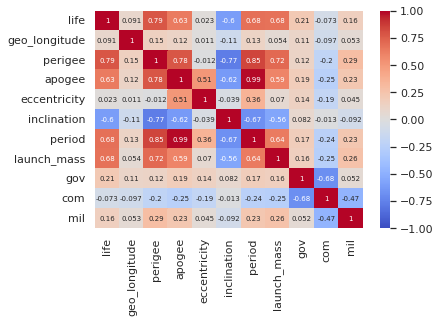

In [ ]:
# Visualization 2 -Heatmap.
fig = sns.heatmap(sat_data.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, annot_kws={'fontsize':7})

In [ ]:
# Visualization 3 - Pie Chart
orbit_count = sat_data['orbit_class'].value_counts()

print(orbit_count)

LEO      2455
GEO       488
MEO       119
Ellip      33
Name: orbit_class, dtype: int64


In [ ]:
values = sat_data['orbit_class'].value_counts().keys().tolist()
counts = sat_data['orbit_class'].value_counts().tolist()

print(values)

['LEO', 'GEO', 'MEO', 'Ellip']


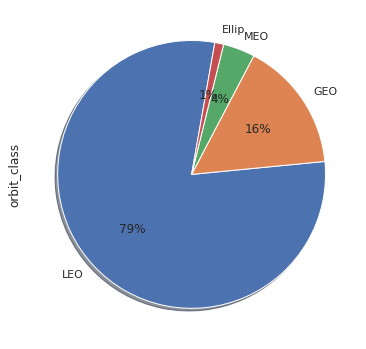

In [ ]:
ax = orbit_count.plot(kind='pie',
                      subplots=True,
                      shadow = True,
                      startangle=80,
                      figsize=(6,10),
                      autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7f13f3efd7d0>,
 [Text(-0.8759353124681468, 0.6653850977977566, 'LEO'),
  Text(0.7632759480191034, -0.7920920572607323, 'GEO'),
  Text(1.08066215866403, -0.20535164677109166, 'MEO'),
  Text(1.0993829386171659, -0.036839574881981973, 'Ellip')],
 [Text(-0.47778289770989824, 0.3629373260715036, '79%'),
  Text(0.4163323352831472, -0.4320502130513085, '16%'),
  Text(0.5894520865440163, -0.11200998914786818, '4%'),
  Text(0.5996634210639086, -0.020094313571990163, '1%')])

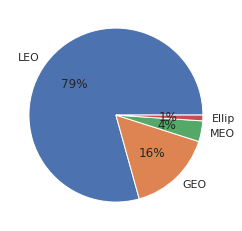

In [ ]:
fig, ax = plt.subplots()

ax.pie(counts,
       autopct='%.0f%%',
       labels = values)

In [ ]:
# Sample data of original data
sat_data.head(10)

,life,orbit_class,geo_longitude,perigee,apogee,eccentricity,inclination,period,launch_mass,gov,com,mil
0,1.0,Ellip,0.0,460,33200,0.705603,31.00,580.00,350.0,True,False,False
1,1.0,Ellip,0.0,952,1155,0.013673,31.00,106.27,348.0,True,False,False
2,2.0,Ellip,0.0,6292,156833,0.856003,53.95,4032.86,4000.0,True,False,False
3,2.0,Ellip,0.0,461,87304,0.864066,15.70,1868.98,126.0,True,False,False
4,2.0,Ellip,0.0,467,87260,0.863896,15.70,1867.91,126.0,True,False,False
5,2.0,Ellip,0.0,474,87526,0.864125,15.70,1875.53,126.0,True,False,False
6,3.0,Ellip,0.0,1375,70009,0.815867,28.90,1433.00,1360.0,True,False,False
7,3.0,Ellip,0.0,1357,70117,0.816491,29.00,1433.00,1360.0,True,False,False
8,3.0,Ellip,0.0,1429,70045,0.814781,29.00,1433.00,1360.0,True,False,False
9,3.0,Ellip,0.0,1317,70157,0.817441,29.00,1433.00,1360.0,True,False,False


# **Data Preparation**


Clean the data

In [ ]:
# One-hot encode dummy variables
sat_data_v2 = pd.get_dummies(sat_data, columns=['orbit_class','gov', 'com','mil'], drop_first=True)
sat_data_v2

,life,geo_longitude,perigee,apogee,eccentricity,inclination,period,launch_mass,orbit_class_GEO,orbit_class_LEO,orbit_class_MEO,gov_True,com_True,mil_True
0,1.0,0.0,460,33200,0.705603,31.00,580.00,350.0,0,0,0,1,0,0
1,1.0,0.0,952,1155,0.013673,31.00,106.27,348.0,0,0,0,1,0,0
2,2.0,0.0,6292,156833,0.856003,53.95,4032.86,4000.0,0,0,0,1,0,0
3,2.0,0.0,461,87304,0.864066,15.70,1868.98,126.0,0,0,0,1,0,0
4,2.0,0.0,467,87260,0.863896,15.70,1867.91,126.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,15.0,0.0,20171,20189,0.000339,54.90,717.88,2300.0,0,0,1,0,1,1
3091,15.0,0.0,20188,20203,0.000282,55.10,718.01,2300.0,0,0,1,0,1,1
3092,15.0,0.0,20165,20199,0.000640,55.06,717.90,2300.0,0,0,1,0,1,1
3093,15.0,0.0,20178,20186,0.000151,55.00,717.90,2300.0,0,0,1,0,1,1


In [ ]:
# Identify and remove NaN to simplify modeling.
sat_data_v2.isna().sum()

life                0
geo_longitude       0
perigee             0
apogee              0
eccentricity        0
inclination         0
period              4
launch_mass        25
orbit_class_GEO     0
orbit_class_LEO     0
orbit_class_MEO     0
gov_True            0
com_True            0
mil_True            0
dtype: int64

In [ ]:
# Drop NaN
sat_data_v3 = sat_data_v2.dropna()

In [ ]:
# Check NaN
sat_data_v3.isna().sum()

life               0
geo_longitude      0
perigee            0
apogee             0
eccentricity       0
inclination        0
period             0
launch_mass        0
orbit_class_GEO    0
orbit_class_LEO    0
orbit_class_MEO    0
gov_True           0
com_True           0
mil_True           0
dtype: int64

Data Split

In [ ]:
# Split the data

# set up X & Y variables
X = sat_data_v3.loc[:, sat_data_v3.columns != 'life']
y = sat_data_v3.loc[:, sat_data_v3.columns == 'life']

# Add constant to the features
X2 = sm.add_constant(X)

# set train size to 70% and test size to 30% with a random state.
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Check out columns
print(sat_data_v3.columns)

Index(['life', 'geo_longitude', 'perigee', 'apogee', 'eccentricity',
       'inclination', 'period', 'launch_mass', 'orbit_class_GEO',
       'orbit_class_LEO', 'orbit_class_MEO', 'gov_True', 'com_True',
       'mil_True'],
      dtype='object')


In [ ]:
sat_data_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3066 entries, 0 to 3094
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   life             3066 non-null   float64
 1   geo_longitude    3066 non-null   float64
 2   perigee          3066 non-null   int64  
 3   apogee           3066 non-null   int64  
 4   eccentricity     3066 non-null   float64
 5   inclination      3066 non-null   float64
 6   period           3066 non-null   float64
 7   launch_mass      3066 non-null   float64
 8   orbit_class_GEO  3066 non-null   uint8  
 9   orbit_class_LEO  3066 non-null   uint8  
 10  orbit_class_MEO  3066 non-null   uint8  
 11  gov_True         3066 non-null   uint8  
 12  com_True         3066 non-null   uint8  
 13  mil_True         3066 non-null   uint8  
dtypes: float64(6), int64(2), uint8(6)
memory usage: 233.5 KB


In [ ]:
# Observe data types
sat_data_v3.dtypes

life               float64
geo_longitude      float64
perigee              int64
apogee               int64
eccentricity       float64
inclination        float64
period             float64
launch_mass        float64
orbit_class_GEO      uint8
orbit_class_LEO      uint8
orbit_class_MEO      uint8
gov_True             uint8
com_True             uint8
mil_True             uint8
dtype: object

# **Modeling - Classical Regression**

Classical Model 1 - Full regression

In [ ]:
# Classical Modeling - Linear regression with all input variables
model = sm.OLS(y_train, X_train)
# model = sm.WLS(y_train, X_train)
# model = sm.GLS(y_train, X_train)

#model.
model = model.fit()
print(model.summary2())

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     0.742    
Dependent Variable: life             AIC:                9325.6784
Date:               2022-10-28 16:50 BIC:                9405.0775
No. Observations:   2146             Log-Likelihood:     -4648.8  
Df Model:           13               F-statistic:        476.1    
Df Residuals:       2132             Prob (F-statistic): 0.00     
R-squared:          0.744            Scale:              4.4872   
------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
const            -4.9222   1.8060 -2.7255 0.0065  -8.4638  -1.3806
geo_longitude    -0.0040   0.0013 -3.1732 0.0015  -0.0065  -0.0015
perigee           0.0010   0.0001 11.7682 0.0000   0.0008   0.0011
apogee           -0.0000   0.0000 -0.2501 0.8025  -0.0001   0.0001
eccentricity 

Regression Model 1 error

In [ ]:
# Test errors
# Get predictions
y_pred_model1 = model.predict(X_test)

print("Classical Model 1 Test Error")
# MSE from model 1
m1_mse = mean_squared_error(y_test, y_pred_model1)
print("Model 1 MSE = {var}".format(var=m1_mse))

m1_mae = mean_absolute_error(y_test, y_pred_model1)
print("Model 1 MAE = {var}".format(var=m1_mae))

Classical Model 1 Test Error
Model 1 MSE = 10.625395908725027
Model 1 MAE = 1.345896114611148


In [ ]:
# Training errors
y_pred_model1_train = model.predict(X_train)

print("Classical Model 1 Training Error")
m1_mse_train = mean_squared_error(y_train, y_pred_model1_train)
print("Model 1 MSE = {var}".format(var=m1_mse_train))

m1_mae_train = mean_absolute_error(y_train, y_pred_model1_train)
print("Model 1 MAE = {var}".format(var=m1_mae_train))

Classical Model 1 Training Error
Model 1 MSE = 4.457932567709509
Model 1 MAE = 1.2394489373900706


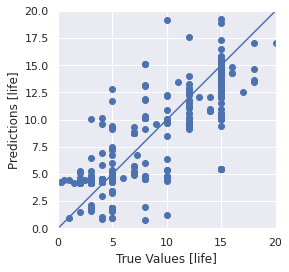

In [ ]:
# plot prediction vs test values
y_pred_model1 = model.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_model1)
plt.xlabel('True Values [life]')
plt.ylabel('Predictions [life]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# **Modeling - Neural Network**

##create normalizer

Import modules

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import r2_score

print(tf.__version__)

2.9.2


Data Preparation

In [ ]:
# Define the data again
data = sat_data_v3
sat_data_v3.describe()

,life,geo_longitude,perigee,apogee,eccentricity,inclination,period,launch_mass,orbit_class_GEO,orbit_class_LEO,orbit_class_MEO,gov_True,com_True,mil_True
count,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.00000,3066.000000,3066.000000
mean,6.211432,2.357883,6874.572407,7643.330724,0.007444,59.536190,346.710385,1008.734736,0.153294,0.797782,0.038813,0.14514,0.833986,0.089693
std,4.201210,36.054911,12919.778511,16451.281717,0.068059,30.969867,574.164990,1802.847836,0.360330,0.401719,0.193180,0.35230,0.372154,0.285789
min,0.250000,-179.800000,170.000000,280.000000,0.000000,0.000000,91.340000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4.000000,0.000000,538.000000,551.000000,0.000225,53.000000,95.600000,148.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
50%,4.000000,0.000000,548.000000,561.000000,0.000939,53.000000,95.600000,260.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
75%,7.000000,0.000000,1215.000000,1220.000000,0.001078,87.400000,100.672500,814.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
max,30.000000,180.000000,37782.000000,330000.000000,0.957119,143.400000,11520.000000,22500.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# Split data into train and test datasets
train_dataset = data.sample(frac=0.7, random_state = 0)
test_dataset = data.drop(train_dataset.index)

print(train_dataset.shape) # Verify number of data points for training and feature numbers
print(test_dataset.shape)  # Verify number of data points for test and feature numbers
print(" ")

train_dataset.tail() # Verify features

(2146, 14)
(920, 14)
 


,life,geo_longitude,perigee,apogee,eccentricity,inclination,period,launch_mass,orbit_class_GEO,orbit_class_LEO,orbit_class_MEO,gov_True,com_True,mil_True
1371,4.0,0.0,548,561,0.000939,53.0,95.60,260.0,0,1,0,0,1,0
1387,4.0,0.0,548,561,0.000939,53.0,95.60,260.0,0,1,0,0,1,0
2625,5.0,0.0,1200,1202,0.000132,87.4,96.75,148.0,0,1,0,0,1,0
2096,4.0,0.0,443,446,0.000220,53.2,93.50,260.0,0,1,0,0,1,0
2550,5.0,0.0,1200,1202,0.000132,87.4,96.30,148.0,0,1,0,0,1,0


Separate features from labels

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

print(train_features.shape)

train_labels = train_features.pop('life')
test_labels = test_features.pop('life')

print(train_features.shape) # separate succesful

(2146, 14)
(2146, 13)


In [ ]:
# Look at distribution of data
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
life,6.273998,4.275459
geo_longitude,3.337870,36.707781
perigee,7061.199441,13088.811821
apogee,7940.931966,17391.819773
eccentricity,0.007974,0.071600
inclination,58.848774,31.128937
period,357.050708,604.552978
launch_mass,1026.338770,1815.259409
orbit_class_GEO,0.158900,0.365668
orbit_class_LEO,0.792171,0.405848


In [ ]:
# Note: The data have pretty different values. Looks like the majority of satellites are in LEO and a Commercial satellites.

In [ ]:
# Prepare normalization of data - Create normalizer
normalizer = preprocessing.Normalization()

In [ ]:
# Adapt it to the training features
normalizer.adapt(np.array(train_features))

In [ ]:
# Define the loss plot
def plot_loss(history,y_lim=10):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, y_lim])
  plt.xlabel('Epoch')
  plt.ylabel('Error [life]')
  plt.legend()
  plt.grid(True)

## Neural network model with normalization

In [ ]:
# Create DNN with normalization layer, 2 hidden layers, 13 inputs, and 1 output
nn_model2 = keras.Sequential([
      normalizer,
      layers.Dense(16, input_dim=13, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(1, activation = 'linear')
  ])

In [ ]:
# define loss function
nn_model2.compile(loss='mean_absolute_error',
  optimizer=tf.keras.optimizers.Adam(0.01))

# Set history
history = nn_model2.fit(
  train_features,
  train_labels,
  validation_split=0.2,
  verbose=1,
  epochs=100)

nn_model2.summary()

Epoch 1/100
54/54 [==============================] - 1s 5ms/step - loss: 0.6207 - val_loss: 0.7575
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5685 - val_loss: 0.7548
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5699 - val_loss: 0.6900
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5641 - val_loss: 0.7304
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5518 - val_loss: 0.7013
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5684 - val_loss: 0.7273
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5490 - val_loss: 0.7570
Epoch 8/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5603 - val_loss: 0.7243
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5412 - val_loss: 0.7170
Epoch 10/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5643 - val_loss: 0.7583
Epoch 11/

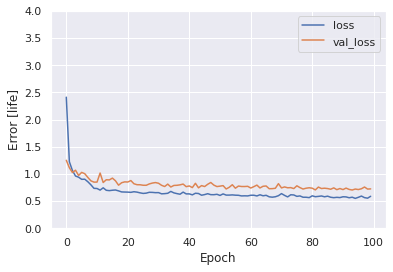

In [ ]:
# adjust plot loss limits slightly
def plot_loss(history,y_lim=4):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, y_lim])
  plt.xlabel('Epoch')
  plt.ylabel('Error [life]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

Test predictions and error

29/29 [==============================] - 0s 1ms/step


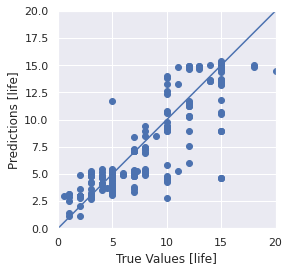

In [ ]:
test_predictions2 = nn_model2.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions2)
plt.xlabel('True Values [life]')
plt.ylabel('Predictions [life]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


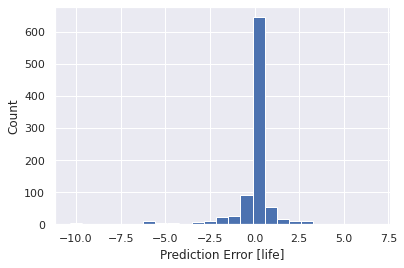

In [ ]:
error = test_predictions2 - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [life]')
_ = plt.ylabel('Count')

Test errors

In [ ]:
print("NN Model 2 Test Error")
# MSE from model 2
nn2_mse = mean_squared_error(test_labels, test_predictions2)
print("MSE = {var}".format(var=nn2_mse))

# MAE from model 2
nn2_mae = mean_absolute_error(test_labels, test_predictions2)
print("MAE = {var}".format(var=nn2_mae))

NN Model 2 Test Error
MSE = 1.6583372207444675
MAE = 0.5170133430024851


Training errors

In [ ]:
train_predictions2 = nn_model2.predict(train_features).flatten()
print("NN Model 2 Training Error")

# MSE from model 2
nn2_mse = mean_squared_error(train_labels, train_predictions2)
print("MSE = {var}".format(var=nn2_mse))

# MAE from model 2
nn2_mae = mean_absolute_error(train_labels, train_predictions2)
print("MAE = {var}".format(var=nn2_mae))

68/68 [==============================] - 0s 2ms/step
NN Model 2 Training Error
MSE = 2.679164938670593
MAE = 0.5879530699477502


In [ ]:
# R2 score
NN2_test_r2 = r2_score(test_labels, test_predictions2)
print("Test R2 = {}".format(NN2_test_r2))

NN2_train_r2 = r2_score(train_labels, train_predictions2)
print("Train R2 = {}".format(NN2_train_r2))

Test R2 = 0.8973312077096565
Train R2 = 0.8533654455652788


In [ ]:
# Save model
nn_model2.save('nn_model2.h5')

# **Database Example**

Connect to database,   
Create empty table named Animal,    
Within the table create 5 fields named AnimalID, AnimalName, etc

In [1]:
import sqlite3

conn=sqlite3.connect("AnimalClinic.db")

my_cursor=conn.cursor()

SQLcommand1="""CREATE TABLE if not exists Animal (
              AnimalID TEXT PRIMARY KEY,
              AnimalName TEXT,
              AnimalBirthDate TEXT,
              AnimalType TEXT,
              AnimalBreed TEXT
              )   """



my_cursor.execute(SQLcommand1)



enter data into table

In [2]:
Records1=[
    ('12282','Whiskers','04/10/2014','cat','Burmese'),     # 5 pieces of data per record
    ('12286','Lady','08/12/2015','dog','Border Collie'),
    ('12290','Rustle','09/02/2015','Dog','Australian shepherd'),
    ('12294','Bushy','03/02/2015','Dog','Himalayan')
    ]

SQLcommand2="""INSERT INTO Animal VALUES (?,?,?,?,?)"""    # ?'s represent placeholders for each piece of data

my_cursor.executemany(SQLcommand2, Records1)

execute database query

In [4]:
query_result = my_cursor.execute("SELECT AnimalName, AnimalType from Animal") # SQL query where Animal is the table name

for row in query_result:
  print(row)



('Whiskers', 'cat')
('Lady', 'dog')
('Rustle', 'Dog')
('Bushy', 'Dog')
